In [252]:
from notebook.services.config import ConfigManager
cm = ConfigManager()
cm.update('livereveal', {
              'width': 1000,
              'height': 600,
              'scroll': True,
})

{'height': 600, 'scroll': True, 'width': 1000}

In [253]:
import nbpresent
nbpresent.__version__

'3.0.2'

In [254]:
# Questions:
#  Q1. Does social-economic standing affect survivorbility?
#  Q2. Does sex affect survivorbility?
#  Q3. Does age regardless of sex affect survivorbility?
#  Q4. Did women and children have preference to lifeboats and therefore survival?
#  Q5.How did children with nannies fare with children without nannies?

# Wrangle data by:
#  1. Removing duplicate entries
#  2. Finding and removing null entries
#  3. Removing unnecessary columns

#Explore the data
#Draw conclusions
#Communicate

In [255]:
# Import modules needed
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pd.options.mode.chained_assignment=None #(assignment to disable SettingWithCopyWarning created to flag potentially 
#confusing 'chained' assignments

# style for all graphs
sns.set(style='darkgrid')
sns.set_color_codes('pastel')

#read in the dataset, create dataframe
titanic = pd.read_csv('titanic_data.csv')

In [256]:
#sample of dataframe
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [257]:
#description of dataframe
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [258]:
# identify duplicate entries
titanic_duplicate = titanic.duplicated().sum()
print('Duplicate entries in titanic dataset: ',titanic_duplicate)

Duplicate entries in titanic dataset:  0


In [259]:
# Remove unnecessary columns
titanic_lite = titanic.drop(['PassengerId','Name','Ticket','Fare','Cabin'],axis=1)
titanic_lite.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [260]:
#description of titanic_lite
titanic_lite.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Embarked    889 non-null object
dtypes: float64(1), int64(4), object(2)
memory usage: 48.8+ KB


In [261]:
#null values in dataframe
titanic_lite.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Embarked      2
dtype: int64

In [262]:
#sample of null values
titanic_null_values = pd.isnull(titanic_lite['Age'])
titanic_lite[titanic_null_values].head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
5,0,3,male,NaN,0,0,Q
17,1,2,male,NaN,0,0,S
19,1,3,female,NaN,0,0,C
26,0,3,male,NaN,0,0,C
28,1,3,female,NaN,0,0,Q


Null age entries won't affect computation of mean as they will be treated as '0' value.

In [263]:
#sum of missing age by gender
missing_age_female = titanic_lite[titanic_null_values]['Sex']=='female'
missing_age_male = titanic_lite[titanic_null_values]['Sex']=='male'

print('{} males and {} females missing ages'.format(missing_age_male.sum(),missing_age_female.sum()))

124 males and 53 females missing ages


In [264]:
#typical descriptive statistics
titanic_lite.describe()

,Survived,Pclass,Age,SibSp,Parch
count,891.000000,891.000000,714.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594
std,0.486592,0.836071,14.526497,1.102743,0.806057
min,0.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000


In [265]:
#passengers less than 1.0 yr in age
titanic_lite[titanic_lite['Age']<1]

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
78,1,2,male,0.83,0,2,S
305,1,1,male,0.92,1,2,S
469,1,3,female,0.75,2,1,C
644,1,3,female,0.75,2,1,C
755,1,2,male,0.67,1,1,S
803,1,3,male,0.42,0,1,C
831,1,2,male,0.83,1,1,S


In [266]:
#youngest and oldest survivors and fatalities
youngest_survivor = titanic_lite[titanic_lite['Survived']==True]['Age'].min()
youngest_dead = titanic_lite[titanic_lite['Survived']==False]['Age'].min()
oldest_dead = titanic_lite[titanic_lite['Survived']==False]['Age'].max()
oldest_survivor = titanic_lite[titanic_lite['Survived']==True]['Age'].max()

print('Youngest survivor: ',youngest_survivor)
print('Youngest fatality: ',youngest_dead)
print('Oldest survivor: ',oldest_survivor)
print('Oldest fatality: ',oldest_dead)

Youngest survivor:  0.42
Youngest fatality:  1.0
Oldest survivor:  80.0
Oldest fatality:  74.0


In [267]:
#No. of passengers by gender
p_by_gender = titanic_lite.groupby(['Sex']).size()

total_male_passengers = titanic_lite['Sex']=='male'
total_female_passengers = titanic_lite['Sex']=='female'

percent_male = (total_male_passengers.sum()/titanic_lite.Sex.count()*100).round(2)
percent_female = (total_female_passengers.sum()/titanic_lite.Sex.count()*100).round(2)

print('No. of male passengers: {}\nNo. of female passengers: {}\n'.format(total_male_passengers.sum(),total_female_passengers.sum()))
print('Percentage of male passengers: {}%\nPercentage of female passengers: {}%'.format(percent_male,percent_female))

No. of male passengers: 577
No. of female passengers: 314

Percentage of male passengers: 64.76%
Percentage of female passengers: 35.24%


Text(0.5,1,'Total no. of passangers by gender.')

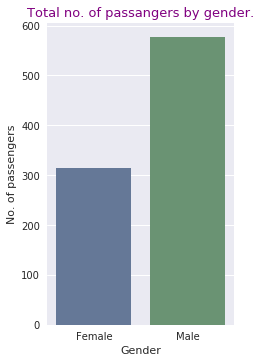

In [268]:
n_group = 2
passengers = p_by_gender #[total_male_passengers.sum(),total_female_passengers.sum()]
index = np.arange(n_group)
g = sns.factorplot(x=index, y=p_by_gender, data=titanic_lite, saturation=0.5, kind='bar', ci=None, size=5, aspect=0.8)
(g.set_axis_labels('Gender','No. of passengers')
.set_xticklabels(['Female','Male'])
#.set_titles('No. of passengers by gender.')
)
plt.title('Total no. of passangers by gender.', fontsize=13, color='purple')

Survived
0    549
1    342
dtype: int64


Text(0.5,1,'Total no. of survivors and fatalities.')

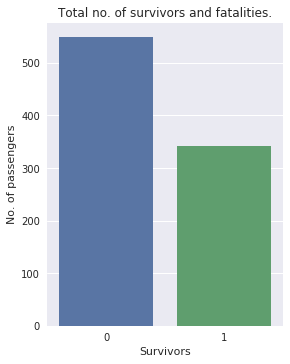

In [269]:
#No. of survivors and fatalities
survivors = titanic_lite.groupby(['Survived']).size()
print(survivors)

g = sns.factorplot('Survived', data=titanic_lite, kind='count', size=5, aspect=0.8)
g.set_axis_labels('Survivors','No. of passengers')
plt.title('Total no. of survivors and fatalities.')

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
dtype: int64


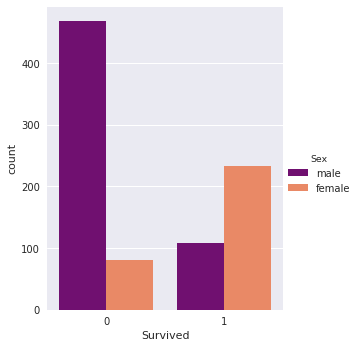

In [270]:
survivors_bysex = titanic_lite.groupby(['Survived','Sex']).size()
print(survivors_bysex)
g = sns.factorplot('Survived', hue='Sex', data=titanic_lite, kind='count', size=5, aspect=0.8, palette={'male':'purple','female':'coral'})

Pclass
1    216
2    184
3    491
dtype: int64


Text(0.5,1,'Total passengers by class.')

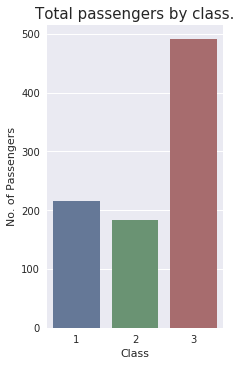

In [271]:
#total no. of passengers in each class
p_by_class = titanic_lite.groupby(['Pclass']).size()
print(p_by_class)

n_group = 3
index = np.arange(n_group)
g = sns.factorplot(x=index, y=p_by_class, data=titanic_lite, saturation=0.5, kind='bar', ci=None, size=5, aspect=0.8)
(g.set_axis_labels('Class','No. of Passengers')
.set_xticklabels(['1','2','3'])
#.set_titles('No. of passengers by class')
.despine(left=True,bottom=True))
plt.title('Total passengers by class.', fontsize=15)

(-1.2203017307939186,
 1.1166105875419734,
 -1.1172913990393432,
 1.10186730344654)

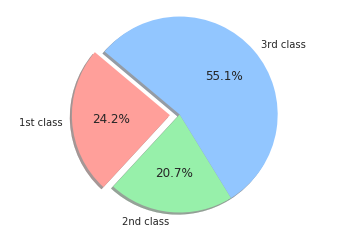

In [272]:
plt.pie(p_by_class, explode=(0.1,0,0), labels=['1st class','2nd class','3rd class'], colors=['r','g','b'], autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')

As expected, third class passengers were the majority of passengers at 55.1%. However, the numbers did not follow the expecte trend with first class passengers outnumbering second class by 3.5%.

In [273]:
#total no. of passengers in each class by sex
class_groupby_sex = titanic_lite.groupby(['Pclass','Sex']).size()
print(class_groupby_sex)


Pclass  Sex   
1       female     94
        male      122
2       female     76
        male      108
3       female    144
        male      347
dtype: int64


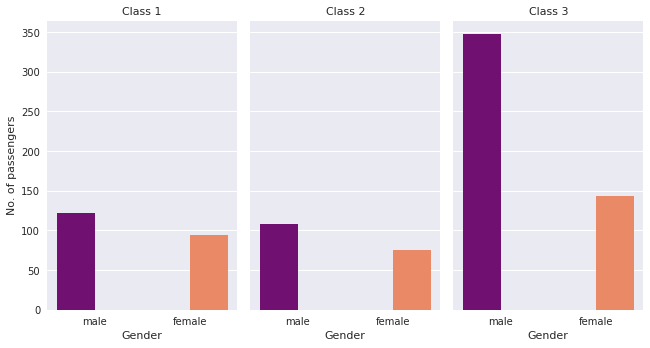

In [274]:
#g = sns.factorplot(x='Sex', y='Survived', col='Pclass', data=titanic_lite, kind='bar', ci=None, size=5, aspect=0.5)
g = sns.factorplot('Sex', col='Pclass', hue='Sex', data=titanic_lite, kind='count', size=5, aspect=0.6,  palette={'male':'purple','female':'coral'})
(g.set_axis_labels('Gender','No. of passengers')
.set_titles('Class {col_name}'))

In [275]:
#no. of survivors and fatalities per class and based on sex
survivors_per_classx = titanic_lite.groupby(['Pclass','Sex','Survived']).size()
print(survivors_per_classx)


Pclass  Sex     Survived
1       female  0             3
                1            91
        male    0            77
                1            45
2       female  0             6
                1            70
        male    0            91
                1            17
3       female  0            72
                1            72
        male    0           300
                1            47
dtype: int64


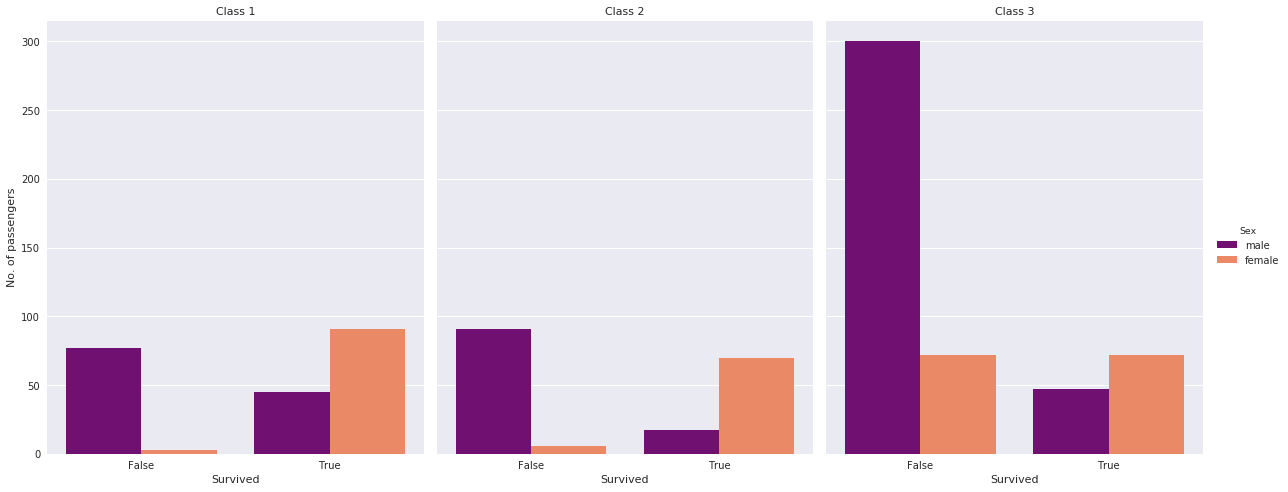

In [276]:
g = sns.factorplot('Survived', col='Pclass', hue='Sex', data=titanic_lite, kind='count', size=7, aspect=0.8,  palette={'male':'purple','female':'coral'})
(g.set_axis_labels('Survived','No. of passengers')
.set_xticklabels(['False','True'])
.set_titles('Class {col_name}'))

In [277]:
# percentage of survivors by class based on sex
def sexsurvival_rate_byclass(Pclass,sex):
    #Arg: 1,2,3
    #sex: male,female
    #output: % survived by sex
    percent = (survivors_per_classx[Pclass,sex,1]/class_groupby_sex[Pclass,sex]*100).round(2)
    return percent

print('1st class - female survival rate: {}%'.format(sexsurvival_rate_byclass(1,'female')))
print('1st class - male survival rate: {}%'.format(sexsurvival_rate_byclass(1,'male')),'\n')

print('2st class - female survival rate: {}%'.format(sexsurvival_rate_byclass(2,'female')))
print('2st class - male survival rate: {}%'.format(sexsurvival_rate_byclass(2,'male')),'\n')

print('3st class - female survival rate: {}%'.format(sexsurvival_rate_byclass(3,'female')))
print('3st class - male survival rate: {}%'.format(sexsurvival_rate_byclass(3,'male')))

1st class - female survival rate: 96.81%
1st class - male survival rate: 36.89% 

2st class - female survival rate: 92.11%
2st class - male survival rate: 15.74% 

3st class - female survival rate: 50.0%
3st class - male survival rate: 13.54%


In [278]:
#percent survivors by class
def survival_rate_byclass(Pclass):
    survivors_per_class = titanic_lite.groupby(['Pclass','Survived']).size()[Pclass,1]
    rate = (survivors_per_class/p_by_class[Pclass]*100).round(2)
    return rate
print('1st class survival rate: {}%'.format(survival_rate_byclass(1)),'\n')
print('2st class survival rate: {}%'.format(survival_rate_byclass(2)),'\n')
print('3st class survival rate: {}%'.format(survival_rate_byclass(3)),'\n')

1st class survival rate: 62.96% 

2st class survival rate: 47.28% 

3st class survival rate: 24.24% 



Socio-economic standing played a big role in the survival rate of passengers. First class passengers had a survival rate of 62.96% - nearly 3x that of a third class passenger at 24.24%.Second class passengers were at 47.28% survival rate; almost 2x that of third class passengers. It's clear preference was given to passengers of high socio-economic standing when it came to rescue attempts.

In [279]:
#overall survival rate
def overall_survival_rate(survived):
    rate = (survivors[survived]/len(titanic_lite)*100).round(2)
    return rate
print('Overall survival rate: {}%'.format(overall_survival_rate(1)),'\n')
print('Overall fatality rate: {}%'.format(overall_survival_rate(0)),'\n')

Overall survival rate: 38.38% 

Overall fatality rate: 61.62% 



In [280]:
#percentage of survivors of fatalities by sex
def overall_survival_rate_bysex(sex,survived):
    rate = (survivors_bysex[survived,sex]/survivors[survived]*100).round(2)
    return rate
print('Percentage of survivors who are male: {}%'.format(overall_survival_rate_bysex('male',1)))
print('Percentage of survivors who are female: {}%'.format(overall_survival_rate_bysex('female',1)),'\n')
print('Percentage of fatalities who are male: {}%'.format(overall_survival_rate_bysex('male',0)))
print('Percentage of fatalities who are female: {}%'.format(overall_survival_rate_bysex('female',0)),'\n')

Percentage of survivors who are male: 31.87%
Percentage of survivors who are female: 68.13% 

Percentage of fatalities who are male: 85.25%
Percentage of fatalities who are female: 14.75% 



Sex of the passenger played a part in their survival as evident from the data:
despite being only 35.24% of passengers who boarded, female passengers formed more than two-thirds of the survivors ; 68.13% while male passengers were 85.25% of the fatalities. It is clear that rescue efforts favored women giving them a survival rate of 2.13x to men.

In [281]:
#remove NA age
titanic_lite_age_cleaned = titanic_lite.dropna()
print('Total no. of passengers with age entries: ',titanic_lite_age_cleaned['Age'].count())

#number of survivors and fatalities with age entries
number_survived = titanic_lite_age_cleaned[titanic_lite_age_cleaned['Survived']==True]['Survived'].count()
number_dead = titanic_lite_age_cleaned[titanic_lite_age_cleaned['Survived']==False]['Survived'].count()

#find average of survivors and fatalities
mean_age_survived = titanic_lite_age_cleaned[titanic_lite_age_cleaned['Survived']==True]['Age'].mean()
mean_age_dead = titanic_lite_age_cleaned[titanic_lite_age_cleaned['Survived']==False]['Age'].mean()

#display few raw totals
print('Total number of survivors: {}\nTotal number of fatalities: {}\nAverage age of survivors: {}\n\
Average age of fatalities: {}'.format(number_survived,number_dead,np.round(mean_age_survived),np.round(mean_age_dead)))

Total no. of passengers with age entries:  712
Total number of survivors: 288
Total number of fatalities: 424
Average age of survivors: 28.0
Average age of fatalities: 31.0


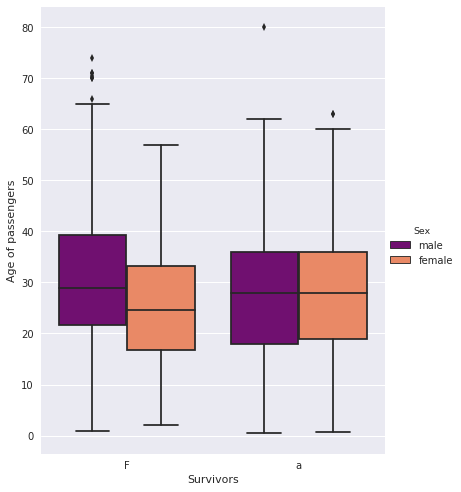

In [282]:
#graph- age of passengers across those who survived
g = sns.factorplot(x='Survived', y='Age', hue='Sex', data=titanic_lite_age_cleaned, kind='box', size=7, aspect=0.8,  palette={'male':'purple','female':'coral'})

(g.set_axis_labels('Survivors','Age of passengers')
.set_xticklabels('False','True'))

Age was not a factor in survival rate for both genders. 

Text(0.5,1,'Age distribution of passengers.')

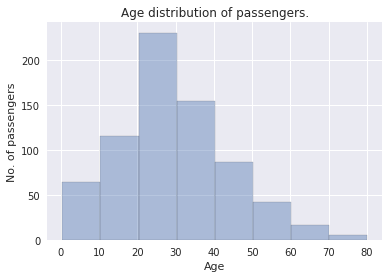

In [283]:
#age distribution of passengers
g = sns.distplot(titanic_lite_age_cleaned['Age'], hist=True, kde=False, bins=8, hist_kws={'edgecolor':'black'})
plt.xlabel('Age')
plt.ylabel('No. of passengers')
plt.title('Age distribution of passengers.')

After removing null age entries, a majority of the passengers were between 20-40 years old.

In [284]:
#create category column and assign man,woman or child
titanic_lite_age_cleaned.loc[((titanic_lite_age_cleaned['Sex']=='female') & (titanic_lite_age_cleaned['Age']>=18)),
                            'Category']='woman'
titanic_lite_age_cleaned.loc[((titanic_lite_age_cleaned['Sex']=='male') & (titanic_lite_age_cleaned['Age']>=18)),
                             'Category']='man'
titanic_lite_age_cleaned.loc[(titanic_lite_age_cleaned['Age']<18),'Category']='child'

#get the totals grouped by man, woman and child by survival
print(titanic_lite_age_cleaned.groupby(['Category','Survived']).size())


Category  Survived
child     0            52
          1            61
man       0           325
          1            70
woman     0            47
          1           157
dtype: int64


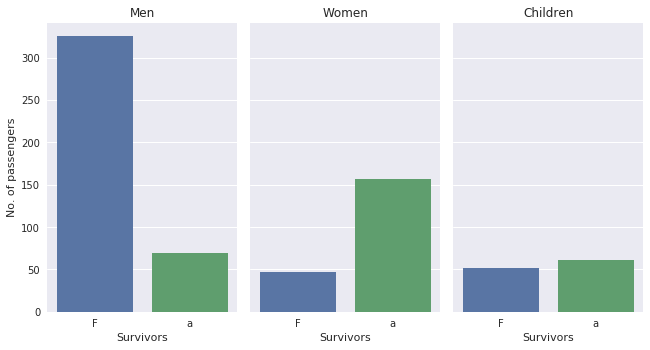

In [285]:
#gragp-compare survival between men,women and children
g = sns.factorplot('Survived', col='Category', data=titanic_lite_age_cleaned, kind='count', size=5, aspect=0.6)
(g.set_axis_labels('Survivors','No. of passengers')
.set_xticklabels('False','True'))

titles = ['Men','Women','Children']
for ax,title in zip(g.axes.flat, titles):
    ax.set_title(title)

The survival rate of women and children is way higher than men. It's important to note that the contemporary definition of child was used (<18yr) as oppossed to that used in the 1900s (probably <14yr). This may have skewed the results showing children's survival rate being lower. Inspite of that, women and children clearly had preference for lifeboats increasing their survival rate.

In [286]:
#separate children with nannies and those with parents
titanic_children_nannies = titanic_lite_age_cleaned.loc[(titanic_lite_age_cleaned['Category']=='child') & 
                                                        (titanic_lite_age_cleaned['Parch']==0)]

titanic_children_parents = titanic_lite_age_cleaned.loc[(titanic_lite_age_cleaned['Category']=='child') &
                                                       (titanic_lite_age_cleaned['Parch']>0)]

# determine children with nannies who survived and who did not
survived_children_nannies = titanic_children_nannies.Survived.sum()
total_children_nannies = titanic_children_nannies.Survived.count()
pct_survived_nannies = ((float(survived_children_nannies)/total_children_nannies)*100)
pct_survived_nannies =np.round(pct_survived_nannies,2)
survived_children_nannies_avg_age = np.round(titanic_children_nannies.Age.mean())

print('Total no. of children with nannies: {}\nNo. of children with nannies who survived: {}\n\
No. of children with nannies who did not survive: {}\nPercent of children who survived: {}%\n\
Average age of children with nannies who survived: {}'.format(total_children_nannies, survived_children_nannies,
                                                             total_children_nannies-survived_children_nannies,
                                                             pct_survived_nannies, survived_children_nannies_avg_age))

Total no. of children with nannies: 32
No. of children with nannies who survived: 16
No. of children with nannies who did not survive: 16
Percent of children who survived: 50.0%
Average age of children with nannies who survived: 15.0


In [287]:
#determine children with parents who survived and who did not
survived_children_parents = titanic_children_parents.Survived.sum()
total_children_parents = titanic_children_parents.Survived.count()
pct_survived_parents = ((float(survived_children_parents)/total_children_parents)*100)
pct_survived_parents =np.round(pct_survived_parents,2)
survived_children_parents_avg_age = np.round(titanic_children_parents.Age.mean())

print('Total no. of children with parents: {}\nNo. of children with parents who survived: {}\n\
No. of children with parents who did not survive: {}\nPercent of children who survived: {}%\n\
Average age of children with parents who survived: {}'.format(total_children_parents, survived_children_parents,
                                                             total_children_parents-survived_children_parents,
                                                             pct_survived_parents, survived_children_parents_avg_age))

Total no. of children with parents: 81
No. of children with parents who survived: 45
No. of children with parents who did not survive: 36
Percent of children who survived: 55.56%
Average age of children with parents who survived: 7.0


To get the number of children travelling with nannies we used the condition Parch==0, leading to making two assumptions: they were not accompanied by an older sibling or simply travelling alone. From the data more children travelled with their parent(s) and they were more likely to survive with a survival rate of 55.56%. However, this was only slightly better than those who travelled with nannies by 5.56%. They also tended to be younger with an average age of 7 years; half the average age of children with nannies. It's safe to say that nannies took as much care of the children as parents.

Embarked
C    168
Q     77
S    644
dtype: int64


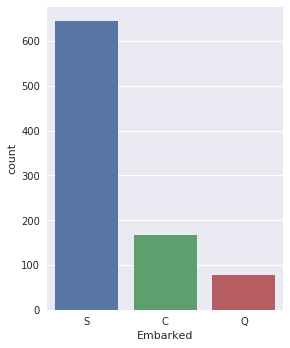

In [288]:
city = titanic_lite.groupby(['Embarked']).size()
print(city)
g = sns.factorplot('Embarked', data=titanic_lite, kind='count', size=5, aspect=0.8)

Embarked  Survived
C         0            75
          1            93
Q         0            47
          1            30
S         0           427
          1           217
dtype: int64


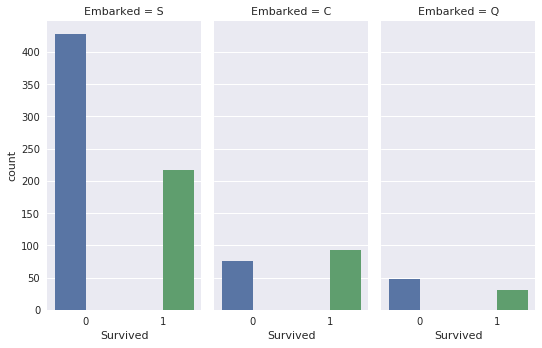

In [289]:
survivors_by_city = titanic_lite.groupby(['Embarked','Survived']).size()
print(survivors_by_city)

g = sns.factorplot('Survived', col='Embarked', hue='Survived', data=titanic_lite, kind='count', size=5, aspect=0.5)

Embarked  Pclass
C         1          85
          2          17
          3          66
Q         1           2
          2           3
          3          72
S         1         127
          2         164
          3         353
dtype: int64


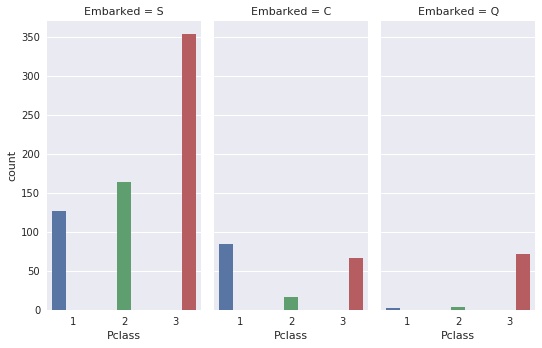

In [290]:
city_by_class = titanic_lite.groupby(['Embarked','Pclass']).size()
print(city_by_class)

g = sns.factorplot('Pclass', col='Embarked', hue='Pclass', data=titanic_lite, kind='count', size=5, aspect=0.5)

The origin of the passengers were Southampton(S), Cherbourgh(C) and Queenstown(Q). Majority of the passenges embarked in Southampton with Queenstown having the least number. Cherbourgh can be assumed to be a wealthy town judging from the percentage of its passengers in first or second class. Southampton follows the normal trend of wealth distribution while Queenstown is skewed towards the lower economic rung.